<a href="https://colab.research.google.com/github/ergikaso1/CV_Exam/blob/main/CV_Exam_ErgiKaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-49-633183b3aa7f>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(image)
<ipython-input-49-633183b3aa7f>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


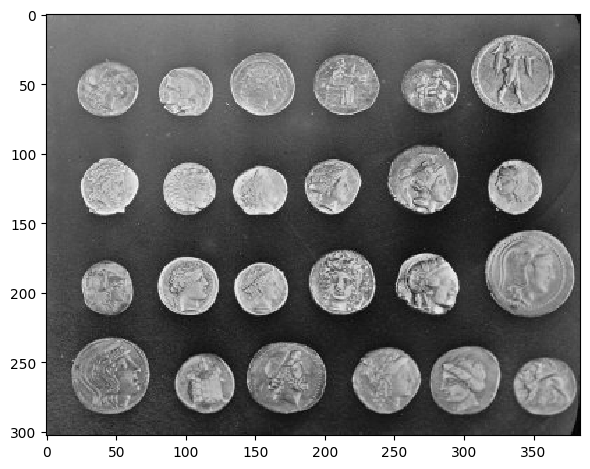

Image size: (303, 384)
Grayscale pixel range: (np.uint8(1), np.uint8(252))


In [49]:
# Task 1:Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.
import skimage as sk
image = sk.data.coins()
sk.io.imshow(image)
sk.io.show()
print(f"Image size: {image_shape}")
print(f"Grayscale pixel range: {grayscale_range}")

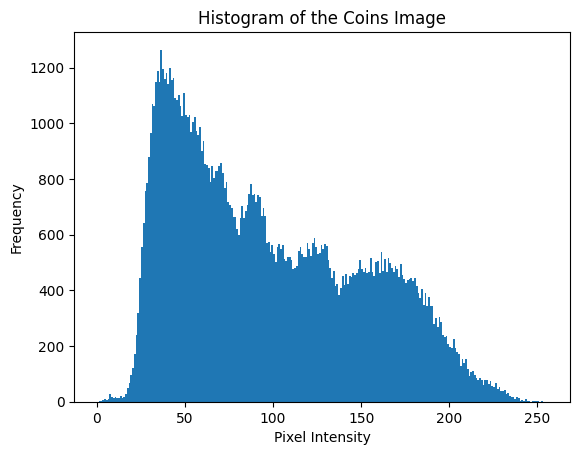

In [50]:
#Task 2:Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.
#Step 1: Flatten the Image
#Step 2: Plot the Histogram
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of the Coins Image')

#Step 3: Label the Plot
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

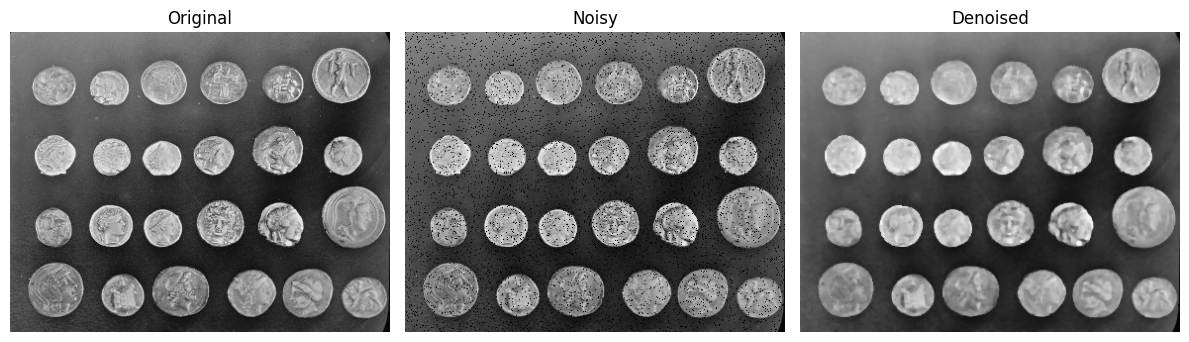

In [51]:
#Task 3: Applied noise to the image and use the correct function to erase the noise.
from skimage import data, filters, morphology
from skimage.util import random_noise
import matplotlib.pyplot as plt


noisy = random_noise(coins, mode='pepper', amount=0.05)

denoise = filters.median(noisy, footprint=morphology.disk(2))


fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(noisy, cmap='gray')
ax[1].set_title('Noisy')
ax[2].imshow(denoise, cmap='gray')
ax[2].set_title('Denoised')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


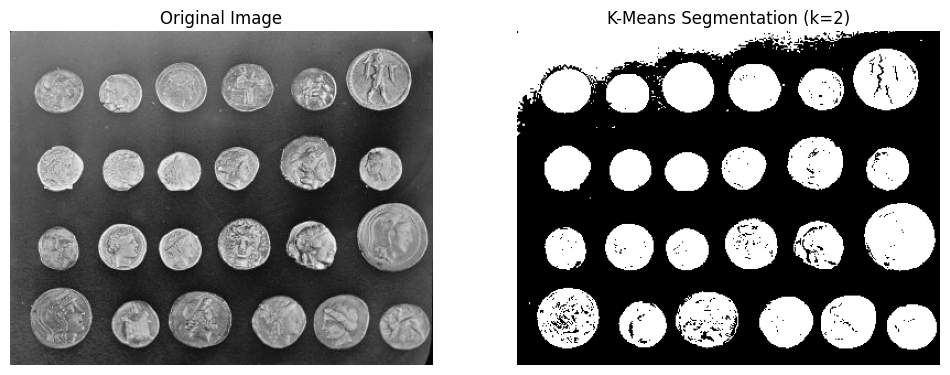

In [52]:
#Task 4:Segment the image using a k-means clustering algorithm with k=2 and represent the result.
from sklearn.cluster import KMeans

pixels = coins.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
segmented = kmeans.labels_.reshape(coins.shape)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

plt.imshow(segmented, cmap='gray')
plt.title('K-Means Segmentation (k=2)')
plt.axis('off')
plt.show()


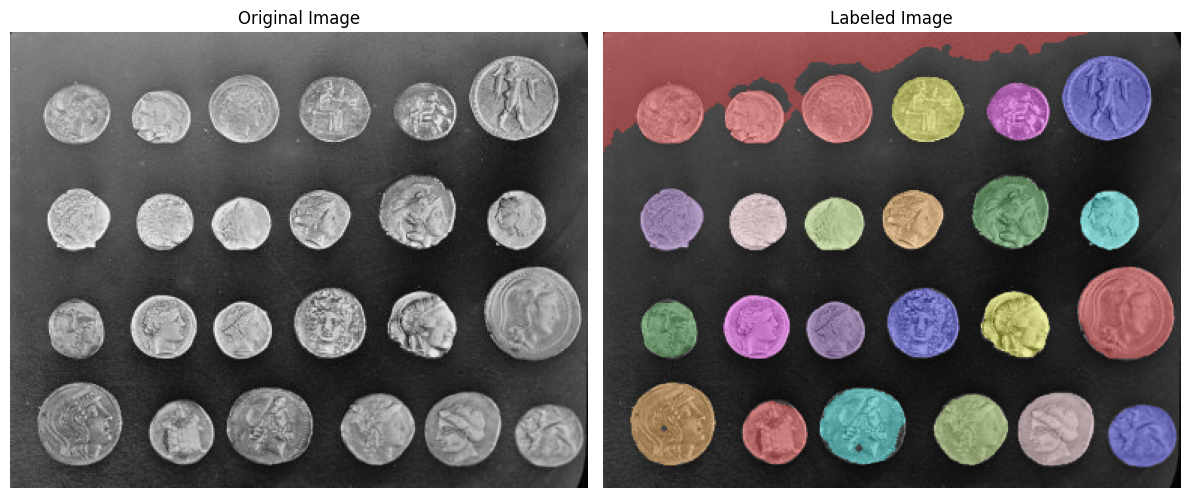

Number of coins detected: 22


In [53]:
#Task 5: Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?
from skimage.filters import threshold_otsu
import numpy as np
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt

thresh = threshold_otsu(denoise)
binary = denoise > thresh
from skimage.morphology import remove_small_objects, closing, disk

cleaned = remove_small_objects(closing(binary, disk(2)), min_size=100)
from skimage.morphology import remove_small_objects, closing, disk

cleaned = remove_small_objects(closing(binary, disk(2)), min_size=100)

labels = label(cleaned)
image_label_overlay = label2rgb(labels, image=image, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_label_overlay)
axes[1].set_title('Labeled Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

regions = regionprops(labels)
num_coins = len(regions)
print(f"Number of coins detected: {num_coins}")


Average Area: 2153.05
Average Major Axis Length: 57.80
Average Orientation: 0.08 radians


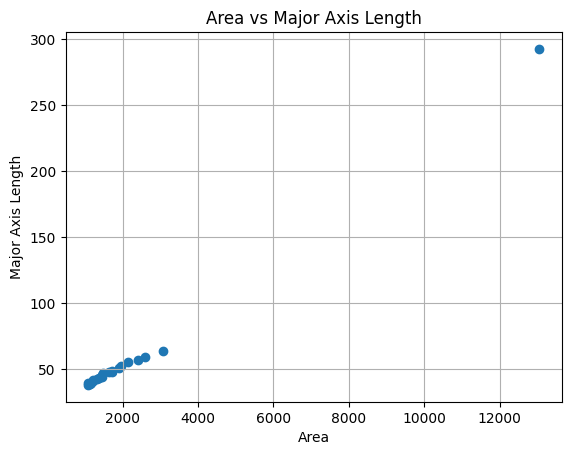

In [54]:
#Task 6: Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.
areas = []
majors = []
orientations = []

for region in regionprops(labels):
    areas.append(region.area)
    majors.append(region.major_axis_length)
    orientations.append(region.orientation)

# Report averages
print(f"Average Area: {np.mean(areas):.2f}")
print(f"Average Major Axis Length: {np.mean(majors):.2f}")
print(f"Average Orientation: {np.mean(orientations):.2f} radians")

# Scatterplot
plt.scatter(areas, majors)
plt.xlabel('Area')
plt.ylabel('Major Axis Length')
plt.title('Area vs Major Axis Length')
plt.grid(True)
plt.show()


In [55]:
#Task 7: Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?
large_coins = [r for r in regionprops(labels) if r.area > 1750]
print(f"Coins with area > 1750: {len(large_coins)}")


Coins with area > 1750: 7


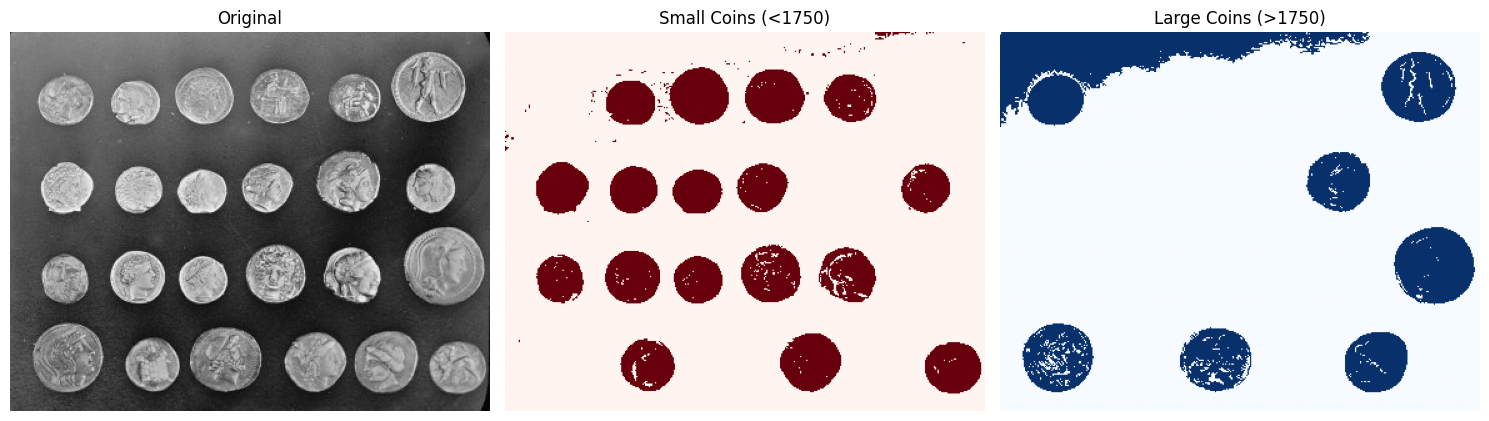

In [56]:
#Task 8: Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).
import matplotlib.patches as mpatches

small_mask = np.zeros_like(coins, dtype=bool)
large_mask = np.zeros_like(coins, dtype=bool)

for region in regionprops(labeled):
    if region.area > 1750:
        for coords in region.coords:
            large_mask[coords[0], coords[1]] = True
    else:
        for coords in region.coords:
            small_mask[coords[0], coords[1]] = True

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(small_mask, cmap='Reds')
ax[1].set_title('Small Coins (<1750)')

ax[2].imshow(large_mask, cmap='Blues')
ax[2].set_title('Large Coins (>1750)')

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


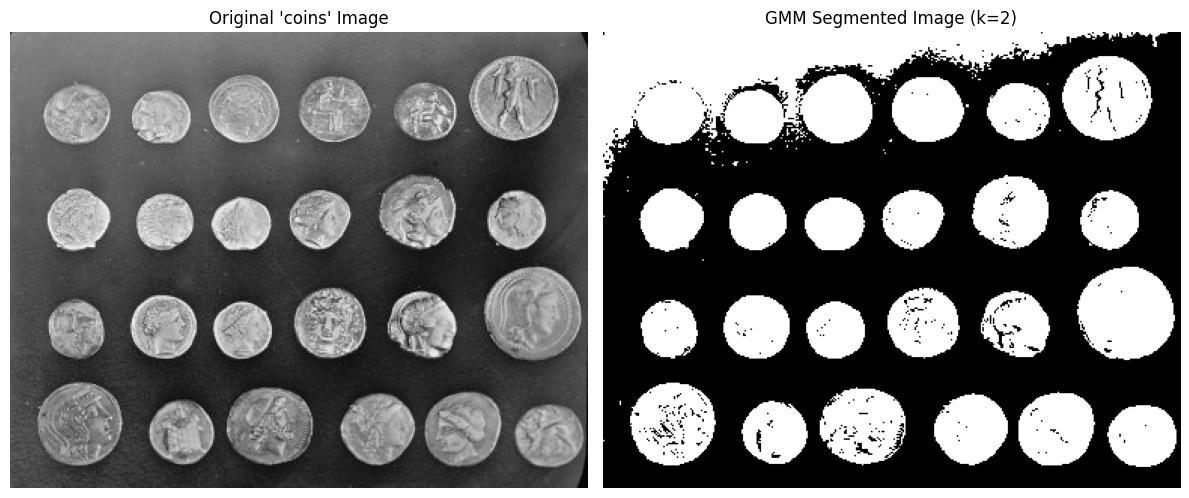

In [57]:
#Task 9:Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)


#Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.mixture import GaussianMixture

#Step 2: Step 2: Load and Prepare the Image
X = image.reshape(-1, 1)

#Step 3: Apply GMM Clustering
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)


#Step 4: Reshape Labels to Image Format
segmented = labels.reshape(image.shape)

#Step 5: Ensure Correct Foreground/Background Assignment
if np.mean(image[segmented == 0]) > np.mean(image[segmented == 1]):
    segmented = 1 - segmented


#Step 6: Display results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original 'coins' Image")
ax[0].axis('off')

ax[1].imshow(segmented, cmap='gray')
ax[1].set_title("GMM Segmented Image (k=2)")
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [58]:
#Task 10:Extract the main texture features of this image
from skimage.feature import graycomatrix, graycoprops

glcm = graycomatrix(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

print(f"Contrast: {contrast:.2f}")
print(f"Dissimilarity: {dissimilarity:.2f}")
print(f"Homogeneity: {homogeneity:.2f}")
print(f"Energy: {energy:.2f}")
print(f"Correlation: {correlation:.2f}")


Contrast: 1469.68
Dissimilarity: 20.30
Homogeneity: 0.13
Energy: 0.01
Correlation: 0.74


Evaluation:

This course was very great and really expanded my previous knowledge in Python and Computer Vision. I really enjoyed it, because it was a lot more practical than theoretical.
Also, the professor did a great job at explaining the concepts and providing real-life examples of them.

Visca Barca y visca Catalunya.